In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [6]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 46
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true);

Branch point 20 of 200, 3 iterations.
Branch point 40 of 200, 3 iterations.
Branch point 60 of 200, 3 iterations.
Branch point 80 of 200, 3 iterations.
Branch point 100 of 200, 3 iterations.
Branch point 120 of 200, 3 iterations.
Branch point 140 of 200, 3 iterations.
Branch point 160 of 200, 5 iterations.


CompositeException: TaskFailedException

    nested task error: AmosException with id 2: overflow.
    Stacktrace:
      [1] _besseli(nu::Float64, z::ComplexF64, kode::Int32)
        @ SpecialFunctions ~/.julia/packages/SpecialFunctions/Zijv9/src/bessel.jl:260
      [2] besseli
        @ ~/.julia/packages/SpecialFunctions/Zijv9/src/bessel.jl:388 [inlined]
      [3] besseli
        @ ~/.julia/packages/SpecialFunctions/Zijv9/src/bessel.jl:644 [inlined]
      [4] _broadcast_getindex_evalf
        @ ./broadcast.jl:678 [inlined]
      [5] _broadcast_getindex
        @ ./broadcast.jl:651 [inlined]
      [6] _getindex
        @ ./broadcast.jl:675 [inlined]
      [7] _getindex
        @ ./broadcast.jl:674 [inlined]
      [8] _broadcast_getindex
        @ ./broadcast.jl:650 [inlined]
      [9] _getindex
        @ ./broadcast.jl:674 [inlined]
     [10] _broadcast_getindex
        @ ./broadcast.jl:650 [inlined]
     [11] getindex
        @ ./broadcast.jl:610 [inlined]
     [12] macro expansion
        @ ./broadcast.jl:973 [inlined]
     [13] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [14] copyto!
        @ ./broadcast.jl:972 [inlined]
     [15] copyto!
        @ ./broadcast.jl:925 [inlined]
     [16] copy
        @ ./broadcast.jl:897 [inlined]
     [17] materialize
        @ ./broadcast.jl:872 [inlined]
     [18] macro expansion
        @ ~/Documents/kylindros/core/equations.jl:41 [inlined]
     [19] (::var"#94#threadsfor_fun#23"{var"#94#threadsfor_fun#22#24"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:253
     [20] #94#threadsfor_fun
        @ ./threadingconstructs.jl:220 [inlined]
     [21] (::Base.Threads.var"#1#2"{var"#94#threadsfor_fun#23"{var"#94#threadsfor_fun#22#24"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 19 more exceptions.


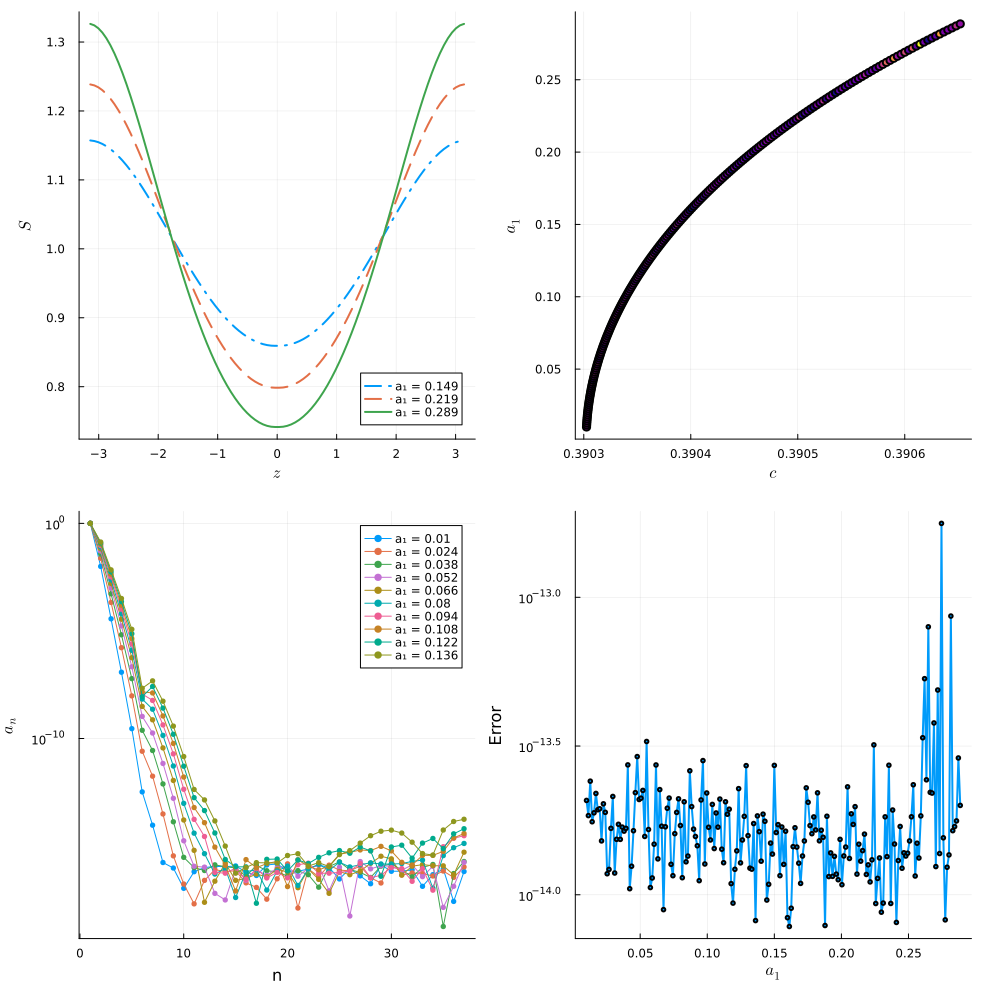

In [7]:
plotEverything(solutions, constants, metadata)

In [4]:
# plotting 
file_name = "36.1.0e-12.100.Broyden"
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting(file_name)
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

# get the constants for this run from the metadata file 


In [15]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-12.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

In [6]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-8.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

#### choosing parameters 
* plot $c_0$ vs. parameters (3-4 plots)
* doesn't matter if $c$, $omega$, etc. (look at wikipedia)

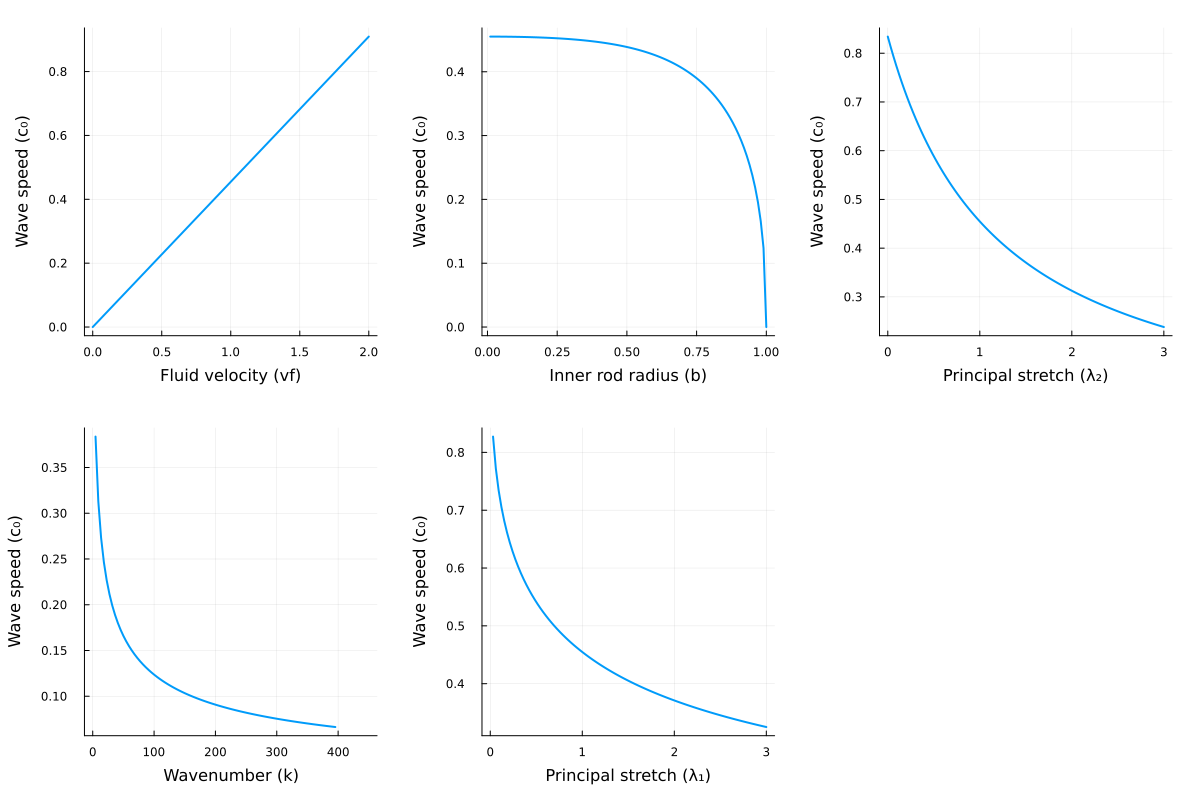

In [5]:
# Default parameters
N = 36
L = π/2
n = 1
k = (n * π) / L               # Wavenumber
default_b = 0.1
default_λ1 = 1.0
default_λ2 = 1.0
default_vf = 1.0

# Parameter ranges
vf_range = range(0, 2.0, length=100)
b_range = range(0.01, 1.0, length=100)
λ2_range = range(0, 3.0, length=100)

# 1. Varying vf (fluid velocity)
c0_vs_vf = zeros(length(vf_range))
for (i, vf) in enumerate(vf_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, vf)
    c0_vs_vf[i] = c0(k, constants)
end

# 2. Varying b (inner rod radius)
c0_vs_b = zeros(length(b_range))
for (i, b) in enumerate(b_range)
    constants = fuConstants(N, L, b, default_λ1, default_λ2, default_vf)
    c0_vs_b[i] = c0(k, constants)
end

# 3. Varying λ2 (principal stretches)
c0_vs_λ2 = zeros(length(λ2_range))
for (i, λ2) in enumerate(λ2_range)
    constants = fuConstants(N, L, default_b, default_λ1, λ2, default_vf)
    c0_vs_λ2[i] = c0(k, constants)
end

# Create plots
p1 = plot(vf_range, c0_vs_vf, 
    xlabel="Fluid velocity (vf)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p2 = plot(b_range, c0_vs_b, 
    xlabel="Inner rod radius (b)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p3 = plot(λ2_range, c0_vs_λ2, 
    xlabel="Principal stretch (λ₂)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


# create one more plot where k is varied 
k_range = range(0, 450.0, length=100)
c0_vs_k = zeros(length(k_range))
for (i, j) in enumerate(k_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, default_vf)
    c0_vs_k[i] = c0(j, constants)
end

p4 = plot(k_range, c0_vs_k, 
    xlabel="Wavenumber (k)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


λ1_range = range(0, 3.0, length=100)
c0_vs_λ1 = zeros(length(λ1_range))
for (i, λ1) in enumerate(λ1_range)
    constants = fuConstants(N, L, default_b, λ1, default_λ2, default_vf)
    c0_vs_λ1[i] = c0(k, constants)
end

p5 = plot(λ1_range, c0_vs_λ1, 
    xlabel="Principal stretch (λ₁)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

# Display plots in a layout
plot(p1, p2, p3, p4, p5, layout=(2,3), size=(1200, 800), margin=20px)

**To Do:**

Saving Results: 
* Make sure everything is being saved correctly (_everything_) 
* Better file names
* Checking if solution already exists (option to stop the program and returns the filename) 

Plotting
* Individual plotting functions for each type of plot: 
    * wave profiles (3 on the same plot samples from different parts of the branch)
    * bifurcation branch (color bar for iterations taken)
    * error plot (across a branch / a1 values)
    * dispersion relation (for a vector of parameter values)

Solutions:
* more modes / resolution
* zero out modes (more frequently)

Precision
* Try using quadruple precision

Housekeeping/Speed: 
* Look through code line by line and: 
    * remove unnecessary computations
    * simplify + make it more readable 
    * minor speed improvments (probably lots of how hanging fruit)

New functionality: 
* Some way to do a parameter search (maybe even create own module)
    * computes branch for all combination of values 
    * keeps going even if there is an error — will need to predict the types of possible errors 
* Useful function to print the run details in a nice way


Error checking: 
* Check for and return error along with tolerance